# 1 Data Cleansing and Exploration
## 1.1 Overview 

The data set is the Amazon Fine Food Reviews dataset consists of reviews of foods from the Amazon online shop.
According to the available information on the dataset it contains 568454 reviews from 256059 users for 74258 products and contains data from October 1999 to October 2012.

Column contents:

- **Id** record number
- **ProductId** product Id
- **UserId** user Id
- **ProfileName** user profile name
- **HelpfulnessNumerator** number of users who found the review helpful
- **HelpfulnessDenominator** number of users who set the helpful flag
- **Score** - rating (1 to 5)
- **Time** - timestamp of the review
- **Summary** - brief summary of the review
- **Text** - body of the review

The particular archive https://ga-data-case-food-review.s3-eu-west-1.amazonaws.com/food_reviews.csv.zip contains MacOs auxiliary file \_\_MACOSX\/._Reviews.csv.


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
# In order to load the dataset one has to decompress it first,
# because original archive contains more than one file 
# and cannot  be read with the compression option:
!unzip -o ./food_reviews.csv.zip Reviews.csv
df_ini = pd.read_csv("./Reviews.csv")

Archive:  ./food_reviews.csv.zip
  inflating: Reviews.csv             


In [3]:
# Obtain general information about the dataset structure:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df_ini.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
print("Number of distinct Id values: ", df_ini["Id"].nunique())
print("Number of distinct UserId values: ", df_ini["UserId"].nunique())
print("Number of distinct ProfileName values: ", df_ini["ProfileName"].nunique())
print("Number of distinct Score values: ", df_ini["Score"].nunique())
print("Number of missing Id values: ", df_ini["Id"].isnull().sum())
print("Number of missing UserId values: ", df_ini["UserId"].isnull().sum())
print("Number of missing ProfileName values: ", df_ini["ProfileName"].isnull().sum())
print("Number of missing Score values: ", df_ini["Score"].isnull().sum())

Number of distinct Id values:  568454
Number of distinct UserId values:  256059
Number of distinct ProfileName values:  218416
Number of distinct Score values:  5
Number of missing Id values:  0
Number of missing UserId values:  0
Number of missing ProfileName values:  16
Number of missing Score values:  0


The available dataset is inline with the initial information.
There is a few records with missing *ProfileName*:

In [6]:
df_ini[df_ini["ProfileName"].isnull()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
172462,172463,B001FA1L9I,AC9U70TRGPDGJ,NaN,0,0,5,1289520000,very good,came in proper packaging. Have loved British ...
297275,297276,B007OXJM6E,A29D7XVSBCLFLD,NaN,0,0,1,1325203200,Burnt,The last SEVERAL time we bought this it tasted...
306751,306752,B000RI1W8E,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...


The records looks healthy apart the profile name and could be used for further analysis.

Now let's check the text fields:

In [133]:
print("min and max length of Summary: ",
      df_ini["Summary"].str.len().min(), 
      df_ini["Summary"].str.len().max())
print("min and max length of Text: ",
      df_ini["Text"].str.len().min(), 
      df_ini["Text"].str.len().max())
print(df_ini["Text"].sample(15))

min and max length of Summary:  1.0 128.0
min and max length of Text:  12 21409
327878    I drink this tea every night, made with 12 oun...
552528    This black leaf tea is rich and strong. Perfec...
530977    This black tea is my husband's favorite and th...
229084    Product was received with a broken NO-TAMPER s...
52495     it is true taste and like having fresh pineapp...
568309    I have had a lot of granola bars in the past. ...
386737    I purchased this coffee because I love Gloria ...
376862    I have been using this product for my dog for ...
453058    I *loved* this tea.  I am mostly alone in my l...
465522    This is a great get started kit that allows yo...
386424    Chocolate glazed donut.  The flavor and aroma ...
198266    The Golden Gate Ficus Bonsai arrived in excell...
469894    If you like oatmeal cookies, you'll love this ...
400029    The 100 calories is reasonable for a coffee pi...
512704    5 star.  Our vet recommended this product for ...
Name: Text, dtype: o

All text fields have nonzero length. The text data cleansing will not be performed at the moment,
because it could be done at tokenization stage.

The dataframe description shows that *Score*, *HelpfulnessNumerator* and *HelpfulnessNumerator* also are in the correct range:

In [112]:
df_ini.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Now let's check correctness of the user's reaction counters:

In [113]:
print("min and max values of the counters ratio: ",
      (df_ini["HelpfulnessNumerator"] / df_ini["HelpfulnessDenominator"]).min(), 
      (df_ini["HelpfulnessNumerator"] / df_ini["HelpfulnessDenominator"]).max())

min and max values of the counters ratio:  0.0 3.0


Although the counters values are in the correct range, however there is a number of records with corrupted counters ratio: number of "useful" replies cannot be greater than the total number of replies.

In [96]:
print("Number of reviews with incorrect user reaction flag counters: ",
      (df_ini.loc[df_ini["HelpfulnessNumerator"] / df_ini["HelpfulnessDenominator"] > 1.0]).shape[0])

Number of reviews with incorrect user reaction flag counters:  2


Let's inspect these records:

In [89]:
df_ini.loc[df_ini["HelpfulnessNumerator"] / df_ini["HelpfulnessDenominator"] > 1.0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


## 1.2 Cleansing
The records looks healthy apart the flag counters. In order to minimize the data loss, 
the *HelpfulnessNumerator* values could be decreased to the *HelpfulnessDenominator* ones
and the records could be kept. We also imput missing *ProfileName* values on this stage:

In [102]:
df_clean = df_ini.copy()
incorrect_ratio = \
    df_clean["HelpfulnessNumerator"] / df_clean["HelpfulnessDenominator"] > 1.0
df_clean.loc[incorrect_ratio, "HelpfulnessNumerator"] = \
    df_clean.loc[incorrect_ratio, "HelpfulnessDenominator"]
df_clean.loc[df_clean["ProfileName"].isnull(), "ProfileName"] = "Imputted"

## 1.3  Deduplication
Now let's check for duplicating reviews:

In [118]:
print("Number of reviews with the same review text and score: ",
      df_clean.duplicated(subset=["Score", "Text"]).sum())
print("Number of reviews with the same review text, summary and score: ",
      df_clean.duplicated(subset=["Score", "Text", "Summary"]).sum())
print(
    "Number of reviews with the same review text, summary, UserId"
    "and score: ",
    df_clean.duplicated(subset=["Score", "Text", "Summary", "UserId"]).sum())
print(
    "Number of reviews with the same review text, summary, "
    "HelpfulnessNumerator and score: ",
    df_clean.duplicated(
        subset=["Score", "Text", "Summary", "HelpfulnessNumerator"]).sum())
#dpt = df_clean.pivot_table(index=["Score", "Text", "Summary", "UserId"],
#                       aggfunc="size")
#dpt.sort_values(ascending=False).head(30)

Number of reviews with the same review text and score:  174779
Number of reviews with the same review text, summary and score:  173448
Number of reviews with the same review text, summary, UserIdand score:  173443
Number of reviews with the same review text, summary, HelpfulnessNumerator and score:  172404


There is a number of duplicating entries, including the same review text and other parameters.
Inspecting available sources it has been found, that the source of duplication is adding of existing reviews of similar articles to the newly appearing ones (e.g. with other package design/size) by Amazon. These records can be used for training the model after deduplication. Since the task includes sentiment analysis of review text, summary, score and possibly user segmentation, the final data set will include *UserId*, *HelpfulnessNumerator* and *HelpfulnessDenominator* for possible reweighting of the review texts, *Score*, *Summary* and *Text*. The values of *HelpfulnessNumerator* and *HelpfulnessDenominator* should be summed up for the remaining record, indicating total reaction of all the users to the same review.

In [134]:
sum_user_reaction = {c: "first" if c == "UserId"
                     else "sum" for c in ["HelpfulnessNumerator", "HelpfulnessDenominator"]}
df_dedup = df_clean.groupby(["Score", "Text", "Summary"]).agg(sum_user_reaction).reset_index()
print("Number of reviews with the same review text and score: ",
      df_dedup.duplicated(subset=["Score", "Text"]).sum())
print("Number of reviews with the same review text, summary and score: ",
      df_dedup.duplicated(subset=["Score", "Text", "Summary"]).sum())
print(
    "Number of reviews with the same review text, summary, "
    "HelpfulnessNumerator and score: ",
    df_dedup.duplicated(
        subset=["Score", "Text", "Summary", "HelpfulnessNumerator"]).sum())
df_dedup.tail()

Number of reviews with the same review text and score:  1331
Number of reviews with the same review text, summary and score:  0
Number of reviews with the same review text, summary, HelpfulnessNumerator and score:  0


,Score,Text,Summary,HelpfulnessNumerator,HelpfulnessDenominator
394998,5,zotz's are the best candies.i order a box of 4...,great candy,0,0
394999,5,"~ I ordered Farie's Finest Coconut powder, Map...","EXCELLENT Quality & Taste; Very, Very Versatil...",6,6
395000,5,"~ Quick Take: Tasty, chewy, soft-baked cookies...",Quaker Soft Baked Oatmeal Cookies,1,2
395001,5,~<br /><br />These are soooooooooooooooooooooo...,"Yummy. yummy, yummy!!!",0,3
395002,5,"~Earth's Best Infant Formula Soy Iron, 13.2-Ou...",Earth's Best Soy Baby Formula,0,0


## 1.4 Data Exploration
Now let's take a look on the clean and deduplicated data:

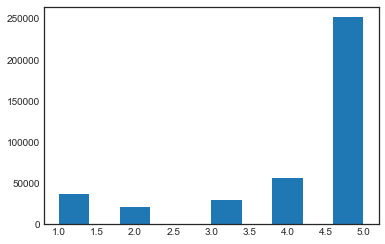

In [150]:
#df_dedup.hist(column="Score")
plt.hist(df_dedup["Score"]);

The data set is imbalanced, the 5-star reviews are dominating, it should be taken into account constructing the training set.

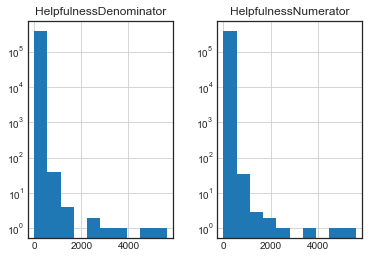

In [151]:
df_dedup.hist(column=["HelpfulnessNumerator", "HelpfulnessDenominator"], log=True);

The user reaction counters are strongly dominated by low values (especially 0), however few (about a hundred) reviews have thousands of user reactions.

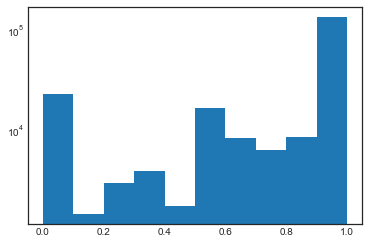

In [158]:
plt.hist((df_dedup.loc[df_dedup["HelpfulnessDenominator"] > 0]["HelpfulnessNumerator"] 
        / df_dedup.loc[df_dedup["HelpfulnessDenominator"] > 0]["HelpfulnessDenominator"]), log=True);

The distribution of the reviews usefulness has two pronounced peaks: at 0 (absolutely not useful reviews)
and at 1 (absolutely useful reviews). This information could be useful for construction of the training set.

## 1.5 Exploration summary
We have a cleaned and deduplicated dataset **df_dedup**, containing *Score*, *Text*, *Summary*, *HelpfulnessNumerator* and *HelpfulnessDenominator* columns. The dataset is imbalanced by the *Score* (5-star reviews are dominating). The *HelpfulnessNumerator* and *HelpfulnessDenominator* user reaction flag counters are informative and could be used for construction of the training set.